# Modelling

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import featuretools as ft
import datetime as dt
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [61]:
df = pd.read_pickle("data/train2.pkl")
df.dtypes

travel_from        category
car_type           category
max_capacity          int64
tickets               int64
year                  int64
month                 int64
day                   int64
weekday               int64
departure_mins        int64
departure_hour        int64
travel_from_int        int8
car_type_int           int8
dtype: object

In [62]:
X = df.drop(["tickets", "travel_from", "car_type"], axis=1)
X.head()

,max_capacity,year,month,day,weekday,departure_mins,departure_hour,travel_from_int,car_type_int
0,49,2017,10,17,1,435,7,10,0
1,49,2017,11,19,6,432,7,10,0
2,49,2017,11,26,6,425,7,5,0
3,49,2017,11,27,0,430,7,2,0
4,49,2017,11,27,0,432,7,10,0


In [63]:
y = df.tickets.astype('float32')
y.head()

0     1.0
1     1.0
2     1.0
3     5.0
4    31.0
Name: tickets, dtype: float32

In [64]:
seed = 7
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

## Random Forest Regressor

In [65]:
rfr = RandomForestRegressor(n_estimators=100, 
                               criterion="mae", 
                               n_jobs=-1)

In [66]:
rfr.fit(X_train, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mae', n_jobs=-1)

In [67]:
rnr_result_set = rfr.predict(X_test)

In [68]:
print(mean_absolute_error(rnr_result_set,y_test))
print(mean_squared_error(rnr_result_set,y_test))
print(r2_score(rnr_result_set,y_test))

3.325591810620602
26.54229440179143
0.5366910601540539


## K-Nearest Neighbor

In [69]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn2 = KNeighborsClassifier(n_neighbors=2)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn4 = KNeighborsClassifier(n_neighbors=4)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn6 = KNeighborsClassifier(n_neighbors=6)

In [70]:
knn1.fit(X,y)
knn2.fit(X,y)
knn3.fit(X,y)
knn4.fit(X,y)
knn5.fit(X,y)
knn6.fit(X,y)

KNeighborsClassifier(n_neighbors=6)

In [71]:
knn1_result_set = knn1.predict(X_test)
knn2_result_set = knn2.predict(X_test)
knn3_result_set = knn3.predict(X_test)
knn4_result_set = knn4.predict(X_test)
knn5_result_set = knn5.predict(X_test)
knn6_result_set = knn6.predict(X_test)

In [72]:
print('K = 1\t', mean_absolute_error(knn1_result_set,y_test))
print('K = 2\t', mean_absolute_error(knn2_result_set,y_test))
print('K = 3\t', mean_absolute_error(knn3_result_set,y_test))
print('K = 4\t', mean_absolute_error(knn4_result_set,y_test))
print('K = 5\t', mean_absolute_error(knn5_result_set,y_test))
print('K = 6\t', mean_absolute_error(knn6_result_set,y_test))

K = 1	 0.0
K = 2	 2.0722969
K = 3	 3.2392833
K = 4	 3.9213052
K = 5	 4.2610364
K = 6	 4.578375


In [73]:
print('K = 1\t', mean_squared_error(knn1_result_set,y_test))
print('K = 2\t', mean_squared_error(knn2_result_set,y_test))
print('K = 3\t', mean_squared_error(knn3_result_set,y_test))
print('K = 4\t', mean_squared_error(knn4_result_set,y_test))
print('K = 5\t', mean_squared_error(knn5_result_set,y_test))
print('K = 6\t', mean_squared_error(knn6_result_set,y_test))

K = 1	 0.0
K = 2	 25.426104
K = 3	 46.3103
K = 4	 58.90787
K = 5	 67.83493
K = 6	 74.98273


In [74]:
print('K = 1\t', r2_score(knn1_result_set,y_test))
print('K = 2\t', r2_score(knn2_result_set,y_test))
print('K = 3\t', r2_score(knn3_result_set,y_test))
print('K = 4\t', r2_score(knn4_result_set,y_test))
print('K = 5\t', r2_score(knn5_result_set,y_test))
print('K = 6\t', r2_score(knn6_result_set,y_test))

K = 1	 1.0
K = 2	 0.5678404928008414
K = 3	 -0.023010335699968243
K = 4	 -0.4165367007098002
K = 5	 -0.5600249017986427
K = 6	 -0.7862653459478917


In [75]:
from sklearn.model_selection import cross_validate
scoring_functions = {"negMSE": "neg_mean_squared_error", "negMAE": "neg_mean_absolute_error"}
cv_info = cross_validate(estimator=knn3, X=X, y=y, scoring=scoring_functions, cv=7, return_train_score=False)
cv_df = pd.DataFrame(cv_info)
cv_df

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


,fit_time,score_time,test_negMSE,test_negMAE
0,0.007326,0.023241,-102.881302,-6.216125
1,0.007025,0.021983,-81.292274,-6.002240
2,0.005999,0.027079,-82.390816,-5.465846
3,0.007004,0.023678,-79.270996,-5.497200
4,0.006920,0.023188,-77.034714,-5.643897
5,0.007000,0.022383,-86.354263,-6.105381
6,0.008002,0.027929,-72.359863,-5.853139


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

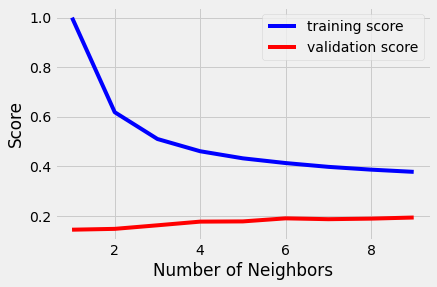

<Figure size 640x480 with 0 Axes>

In [95]:
#plots the validation curve of K's up to 10

from sklearn.model_selection import validation_curve
from matplotlib.pyplot import figure
Ks= np.arange(0,10)
train_score, val_score = validation_curve(KNeighborsClassifier(), X, y, param_name = 'n_neighbors', param_range = Ks, cv = 7)
plt.plot(Ks, np.median(train_score,1), color = 'blue', label = 'training score')
plt.plot(Ks, np.median(val_score,1), color = 'red', label = 'validation score')
plt.legend(loc = 'best')
plt.ylim = (0,1)
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
figure(figsize=(8, 6), dpi=80)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


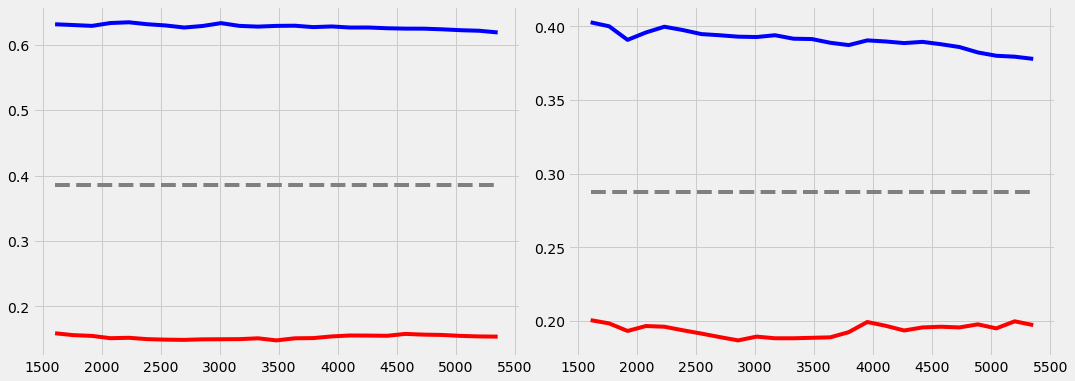

In [96]:
from sklearn.model_selection import learning_curve

fig,ax = plt.subplots(1, 2, figsize = (16,6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)

for i, k in enumerate([2,9]):
    N, train_lc, val_lc = learning_curve(KNeighborsClassifier(k), X, y, cv=7, train_sizes = np.linspace(0.3,1,25))
    ax[i].plot(N, np.mean(train_lc, 1), color = 'blue', label = 'training score')
    ax[i].plot(N, np.mean(val_lc, 1), color = 'red', label = 'validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color = 'gray', linestyle = 'dashed')



## Testing Random Forest Regressor on test data

In [48]:
df_test = pd.read_csv("data/test_questions.csv")
df_test.head(30)

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11
5,287,2018-05-04,07:02,Kisii,Nairobi,Bus,49
6,288,2018-05-04,09:30,Kisii,Nairobi,shuttle,11
7,292,2018-05-04,19:03,Kisii,Nairobi,Bus,49
8,298,2018-05-04,09:00,Kisii,Nairobi,shuttle,11
9,302,2018-05-04,08:40,Kisii,Nairobi,shuttle,11


In [49]:
tickets_df = df_test.groupby(by=['ride_id'])['ride_id'].count().to_frame()
tickets_df = tickets_df.rename(columns = {'ride_id':'tickets'})
df_test = pd.merge(df_test,tickets_df,on='ride_id')
df_test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,tickets
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49,1
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11,1
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11,1
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11,1
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11,1


In [50]:
print(len(df_test['ride_id'].unique()))
df_test.shape

1111


(1111, 8)

In [51]:
df_test['year'] = pd.DatetimeIndex(df_test['travel_date']).year
df_test['month'] = pd.DatetimeIndex(df_test['travel_date']).month
df_test['day'] = pd.DatetimeIndex(df_test['travel_date']).day

df_test['travel_date'] = pd.to_datetime(df_test["travel_date"], format = "%Y-%m-%d")
df_test["weekday"] = df_test["travel_date"].dt.dayofweek

df_test["departure_mins"] = df_test["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
df_test['hour'] = df_test.travel_time.map(lambda x: pd.to_datetime(x).hour)

df_test["travel_from"] = pd.Categorical(df_test["travel_from"])
travel_from_categories = df_test.travel_from.cat.categories
df_test["travel_from_cat"] = df_test.travel_from.cat.codes
df_test["travel_from_cat"] = df_test["travel_from_cat"] + 1

df_test["car_type"] = pd.Categorical(df_test["car_type"])
car_type_categories = df_test.car_type.cat.categories
df_test["car_type_int"] = df_test.car_type.cat.codes


df_test.dtypes

ride_id                     int64
travel_date        datetime64[ns]
travel_time                object
travel_from              category
travel_to                  object
car_type                 category
max_capacity                int64
tickets                     int64
year                        int64
month                       int64
day                         int64
weekday                     int64
departure_mins              int64
hour                        int64
travel_from_cat              int8
car_type_int                 int8
dtype: object

In [52]:
cols_to_drop = ['travel_date', 'travel_time',
                'travel_to', 'travel_from', 'car_type']
df_test1 = df_test.drop(columns = cols_to_drop, axis=0)

In [53]:
df_test1.head()

,ride_id,max_capacity,tickets,year,month,day,weekday,departure_mins,hour,travel_from_cat,car_type_int
0,247,49,1,2018,5,7,0,426,7,6,0
1,256,11,1,2018,5,6,6,668,11,6,1
2,275,11,1,2018,5,4,4,300,5,6,1
3,285,11,1,2018,5,4,4,550,9,6,1
4,286,11,1,2018,5,4,4,560,9,6,1


In [54]:
X_test = df_test1.drop(['ride_id', 'tickets'], axis=1)
y_test = df_test1['tickets']
test_set_predictions = rfr.predict(X_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- hour
- travel_from_cat
Feature names seen at fit time, yet now missing:
- departure_hour
- travel_from_int

  warnings.warn(message, FutureWarning)


In [55]:
print(mean_absolute_error(test_set_predictions,y_test))
print(mean_squared_error(test_set_predictions,y_test))
print(r2_score(test_set_predictions,y_test))

3.4266381638163814
39.49908022052205
-0.423019466789055


In [56]:
d = {'ride_id': df_test1["ride_id"], 'tickets': test_set_predictions}
df_predictions = pd.DataFrame(data=d)
df_predictions = df_predictions[['ride_id','tickets']]

In [57]:
df_predictions.head()

,ride_id,tickets
0,247,1.83
1,256,1.60
2,275,2.59
3,285,2.51
4,286,2.08


In [58]:
df_predictions.to_pickle('data/preds_test_set.pkl')